In [5]:
"""IMPORTS"""
import numpy as np
from helpers import *
from implementations import *
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
"""LOADING RAW DATA"""
data_path = 'dataset'
x_tr_raw, x_te_raw, y_tr_raw, train_ids, test_ids = load_csv_data(data_path, sub_sample=False)

In [11]:
(list(y_tr_raw).count(1))/(len(y_tr_raw))

0.08830207079403295

In [4]:
"""REMOVE USELESS COLUMNS"""
columns_to_remove = np.concatenate((range(1, 25), range(54, 56)))

x_tr_remove_col = np.delete(x_tr_raw, columns_to_remove, axis=1)
x_te_remove_col = np.delete(x_te_raw, columns_to_remove, axis=1)

In [4]:
"""SPLITTING TRAINING DATA INTO TRAINING AND VALIDATION"""
x_tr_sp, x_val_sp, y_tr_sp, y_val_sp = split_data(x_tr_remove_col, y_tr_raw, ratio=0.8, seed=1)

In [5]:
thresh= 1.0
dup = 3
lambda_ = 0.0009
should_be = 0.4216661927779357

# Treat dk, refuse and nan the same
x_tr_dk = replace_dk_values_with_nan(x_tr_sp)
x_val_dk = replace_dk_values_with_nan(x_val_sp)

# Keeping columns with less than threshold% of nan
x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)

# Standardize
x_tr_std, x_val_std = standardize(x_tr_less_nan, x_val_less_nan)

# Nan to 0
x_tr_no_nan, x_val_no_nan = nan_to_zero(x_tr_std, x_val_std)

# Duplicate 1 rows to balance dataset
x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_no_nan, y_tr_sp, dup)

x_tr = x_tr_duplicated
x_val = x_val_no_nan
y_tr = y_tr_duplicated
y_val = y_val_sp

In [10]:
x_poly_tr = build_poly(x_tr, 2)
x_poly_val = build_poly(x_val, 2)

tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]

w_tmp, mse = ridge_regression(y_tr, tx, lambda_)

predict_and_evaluate(x_poly_val, w_tmp, y_val, regression_type = "gd")

Accuracy: 0.8771389824310116
F1-score: 0.4267330252399573


0.4267330252399573

In [20]:
## Hyperparameter search
threshs = [0.5, 0.8, 0.9, 1]
dups = [2, 3, 4, 5]
lambdas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
degrees = [1, 2, 3, 4, 5]

x_tr_dk = replace_dk_values_with_nan(x_tr_sp)
x_val_dk = replace_dk_values_with_nan(x_val_sp)

f1_best = 0
dup_best = 100
thresh_best = 100
deg_best = 100
lambda_best = 100

top_10_results = []

for thresh in threshs:
    x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)
    x_tr_std, x_val_std = standardize(x_tr_less_nan, x_val_less_nan)
    x_tr_no_nan, x_val_no_nan = nan_to_zero(x_tr_std, x_val_std)

    for dup in dups:
        x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_no_nan, y_tr_sp, dup)

        x_tr = x_tr_duplicated
        x_val = x_val_no_nan
        y_tr = y_tr_duplicated
        y_val = y_val_sp

        for deg in degrees:
            x_poly_tr = build_poly(x_tr, deg)
            x_poly_val = build_poly(x_val, deg)
            tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]
            
            for lambda_ in lambdas:
                print("Threshold:", thresh, " # Duplications:", dup, "Degree:", deg, "Lambda:", lambda_)
                
                w_rr = ridge_regression(y_tr, tx, lambda_)
                f1 = predict_and_evaluate(x_poly_val, w_rr, y_val, regression_type = "gd")

                result = {
                "Threshold": thresh,
                "Duplications": dup,
                "Degree": deg,
                "Lambda": lambda_,
                "F1 Score": f1
                }

                if f1 > f1_best:
                    f1_best = f1
                    dup_best = dup
                    thresh_best = thresh
                    deg_best = deg
                    lambda_best = lambda_

                top_10_results.append(result)

print("BEST RESULT: ", "Threshold: ", thresh_best, "# duplications: ", dup_best, "lambda: ", lambda_best, "degree: ", deg_best, "f1: ", f1_best)

top_10_results.sort(key=lambda x: x["F1 Score"], reverse=True)

print("Top 10 Results with the Highest F1 Scores:")
for i, result in enumerate(top_10_results[:10]):
    print(f"Rank {i + 1}:")
    print(f"Threshold: {result['Threshold']}")
    print(f"Duplications: {result['Duplications']}")
    print(f"Degree: {result['Degree']}")
    print(f"Lambda: {result['Lambda']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("---------------------------------------------")

Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09099913145504138
F1-score: 0.1585680635287812
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8960793575814833
F1-score: 0.4005976445772544
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961860209974554
F1-score: 0.4010549450549451
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896155545735749
F1-score: 0.40108972668951576
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961098328431896
F1-score: 0.4019298245614035
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958812683803922
F1-score: 0.40203027916338496
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8926966035320828
F1-score: 0.4041292942968353
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8882472153229616
F1-score: 0.4093105670103093
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.847181800173709
F1-score: 0.4044890445935514
Threshold: 0.5  # Duplications: 2 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8052021271732671
F1-score: 0.38133952768099105
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.32277873436238136
F1-score: 0.09453182299731072
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8917975833117467
F1-score: 0.40151706700379264
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896155545735749
F1-score: 0.4062037117713688
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961707833666022
F1-score: 0.4042664801538731
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8965060112453715
F1-score: 0.4026385224274406
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8970240906943788
F1-score: 0.40310899134428546
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8973897938348545
F1-score: 0.39562017591096754
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8983345269477502
F1-score: 0.39400544959128064
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9001478050192756
F1-score: 0.37213758742933795
Threshold: 0.5  # Duplications: 2 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9010925381321712
F1-score: 0.35624318159278
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.47509409237051825
F1-score: 0.20911011112131508
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8946927331738461
F1-score: 0.4077470220241666
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8965669617687841
F1-score: 0.40912256267409475
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963688725676932
F1-score: 0.4075267880477393
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8972678927880293
F1-score: 0.40849271802070536
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8971917046337635
F1-score: 0.40570774244693036
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8975116948816798
F1-score: 0.4
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974507443582672
F1-score: 0.39521926671459373
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8986545171956665
F1-score: 0.3842236829923155
Threshold: 0.5  # Duplications: 2 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8990354579669952
F1-score: 0.3743153918791312
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.4534566565590382
F1-score: 0.1394846696415719
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8895271763146266
F1-score: 0.4019138755980861
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8896947902540113
F1-score: 0.4010920824025813
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963993478293995
F1-score: 0.4091422612322934
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8973136056805888
F1-score: 0.4074562560450189
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974964572508266
F1-score: 0.40579454111827573
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980754872232465
F1-score: 0.40153887447436704
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8978469227604492
F1-score: 0.39549143372407575
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8967650509698752
F1-score: 0.3852644950548952
Threshold: 0.5  # Duplications: 2 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961707833666022
F1-score: 0.37760321519912315
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9079647096469441
F1-score: 0.016927083333333332
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8944641687110488
F1-score: 0.40742642026009585
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8962164962591617
F1-score: 0.4087160343779842
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8965821993996373
F1-score: 0.4088494033620764
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974202690965609
F1-score: 0.40770719690304413
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979688238072745
F1-score: 0.40848056537102473
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979688238072745
F1-score: 0.40267618198037464
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979992990689808
F1-score: 0.39834621607046555
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8986240419339601
F1-score: 0.39036012095665723
Threshold: 0.5  # Duplications: 2 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8981669130083655
F1-score: 0.38411206340429455
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8758437838084935
F1-score: 0.418
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8758742590701998
F1-score: 0.4181428571428571
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8756609322382556
F1-score: 0.4178912826366101
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.875599981714843
F1-score: 0.41868413557391054
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8747009614945068
F1-score: 0.4172631280561264
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8692916025416368
F1-score: 0.41503000545553737
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8630289362609901
F1-score: 0.4142829217436632
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8106724366495497
F1-score: 0.387780241438778
Threshold: 0.5  # Duplications: 3 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7648071677815533
F1-score: 0.35967641568139386
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8696573056821125
F1-score: 0.4116109506121888
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8713486827068128
F1-score: 0.41583062339998617
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8758590214393466
F1-score: 0.4216653652303543
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8762704374723818
F1-score: 0.42041399000713775
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8766056653511513
F1-score: 0.41958142201834864
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.876773279290536
F1-score: 0.41790829914345357
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.41619338867045286
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782360918524388
F1-score: 0.41350458715596333
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8805522117421183
F1-score: 0.4028338538889312
Threshold: 0.5  # Duplications: 3 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8825026284913222
F1-score: 0.3925955100433241
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8743809712465905
F1-score: 0.4194366197183098
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8766970911362701
F1-score: 0.4227421886146383
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8768494674448016
F1-score: 0.42296158789090393
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773675468938089
F1-score: 0.4219221376239046
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773370716321026
F1-score: 0.4201123757383662
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774132597863684
F1-score: 0.41774625461388154
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782360918524388
F1-score: 0.41820167455405904
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8789827357642434
F1-score: 0.408108510955433
Threshold: 0.5  # Duplications: 3 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8795312904749569
F1-score: 0.4018762293841731
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.5482194828348088
F1-score: 0.17183877545319964
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8687735230926296
F1-score: 0.4139902014153511
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8696420680512594
F1-score: 0.4157617974458786
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8766818535054169
F1-score: 0.42328796408465763
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774437350480747
F1-score: 0.421408531760305
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777332500342847
F1-score: 0.4209842690142878
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777332500342847
F1-score: 0.4171146302484382
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8785256068386488
F1-score: 0.4174218064893306
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8767275663979764
F1-score: 0.40540937821549317
Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.876788516921389
F1-score: 0.40041524543971524
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0
Accuracy: 0.17550703216663874
F1-score: 0.1387071613899368
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8735581391805202
F1-score: 0.41923292273236284
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8764380514117665
F1-score: 0.42329848517175167
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8768342298139485
F1-score: 0.42309613874812646
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777942005576973
F1-score: 0.4220236379360046
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.877961814497082
F1-score: 0.4213568383787298
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783732305301172
F1-score: 0.41898384044256803
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8788151218248587
F1-score: 0.4179170021225206
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.878251329483292
F1-score: 0.40735795875982794
Threshold: 0.5  # Duplications: 3 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8785865573620614
F1-score: 0.40528437080161217
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8542368232587197
F1-score: 0.4122634553944458
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8542520608895728
F1-score: 0.4130101258054618
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8541453974736009
F1-score: 0.41297681834907396
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.854069209319335
F1-score: 0.41285022377536634
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8536425556554467
F1-score: 0.4132917964693665
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8530025751596142
F1-score: 0.41287809628141925
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8460085025980161
F1-score: 0.40921314158774696
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8367287854084446
F1-score: 0.4032302979671401
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7779115303152666
F1-score: 0.3705463182897862
Threshold: 0.5  # Duplications: 4 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7333262224389352
F1-score: 0.34494890893438634
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8482484343334299
F1-score: 0.4092769440654843
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8496350587410669
F1-score: 0.4110766292671282
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8527587730659637
F1-score: 0.41503722985652886
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8551053682173496
F1-score: 0.4165899748450826
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8554253584652658
F1-score: 0.41633858267716534
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8558062992365947
F1-score: 0.4166923503667632
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8561110518536578
F1-score: 0.4140242010549178
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8570862602282597
F1-score: 0.4131155747450097
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.860362350861688
F1-score: 0.4063228815755377
Threshold: 0.5  # Duplications: 4 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8624346686577171
F1-score: 0.3990147783251232
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.588355402502019
F1-score: 0.2267510089589833
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8532159019915584
F1-score: 0.41437169432792265
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8552882197875874
F1-score: 0.4171831850260816
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8553034574184406
F1-score: 0.4167792654465053
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8558520121291542
F1-score: 0.41705693862459947
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8558672497600073
F1-score: 0.4160750663621211
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8564310421015741
F1-score: 0.41550868486352355
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8564462797324272
F1-score: 0.41305837642514487
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8579700428177427
F1-score: 0.40740034331489605
Threshold: 0.5  # Duplications: 4 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8583662212199247
F1-score: 0.4019046393410977
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09099913145504138
F1-score: 0.1585680635287812
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8473189388513874
F1-score: 0.40891930155733835
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8477303548844226
F1-score: 0.40915272275764203
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.852591159126579
F1-score: 0.41348369103916577
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8554863089886784
F1-score: 0.4166564153032354
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8561872400079236
F1-score: 0.41747932354030365
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8572386365367912
F1-score: 0.41607977563103776
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8575281515230012
F1-score: 0.41467384499812193
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8567967452420497
F1-score: 0.40773884547517014
Threshold: 0.5  # Duplications: 4 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8557605863440352
F1-score: 0.3995178888606953
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.35866335502156127
F1-score: 0.09778997234785963
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8524235451871943
F1-score: 0.4149096840451882
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.854556813506636
F1-score: 0.4168855763944041
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8548768037545522
F1-score: 0.4169931439764937
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.856034863699392
F1-score: 0.4165740397678152
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8568424581346092
F1-score: 0.41758105511127636
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.858000518079449
F1-score: 0.4175989000687457
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8578633794017706
F1-score: 0.41524573721163494
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8582747954348058
F1-score: 0.41002220107833814
Threshold: 0.5  # Duplications: 4 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8569795968122876
F1-score: 0.4028502353989057
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8333460313590443
F1-score: 0.40394571911275823
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8332850808356317
F1-score: 0.4039875796698807
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8331479421579533
F1-score: 0.40404919995646016
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.833117466896247
F1-score: 0.40419976063540425
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8325079616621208
F1-score: 0.4039045553145337
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8314260898715468
F1-score: 0.4033867227525212
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8227863531778079
F1-score: 0.39921479491683026
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8125923781370472
F1-score: 0.3938692030949682
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7499047648071678
F1-score: 0.35470807941812466
Threshold: 0.5  # Duplications: 5 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7085650723025584
F1-score: 0.33205280435845497
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8273728800646075
F1-score: 0.4016899920781621
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8290033065658952
F1-score: 0.40238577058259667
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8318832187971414
F1-score: 0.4057736844939947
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.83429076447194
F1-score: 0.4078410019057991
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8344583784113246
F1-score: 0.40672782874617736
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8343212397336462
F1-score: 0.405749576433295
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8356469136178707
F1-score: 0.40559903008927584
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365916467307662
F1-score: 0.40646446756696925
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8382830237554665
F1-score: 0.39825367125928446
Threshold: 0.5  # Duplications: 5 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8406296189068524
F1-score: 0.3942079351288734
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.696329254727475
F1-score: 0.1857405515832482
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8331327045271001
F1-score: 0.40616018654086006
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351135965380103
F1-score: 0.408138708089482
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8350983589071571
F1-score: 0.4076628352490422
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8350831212763039
F1-score: 0.40738104364014677
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.834991695491185
F1-score: 0.40724724943894036
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357840522955491
F1-score: 0.40599680317477815
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8361192801743185
F1-score: 0.404320132927167
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8376582808904871
F1-score: 0.3998422712933754
Threshold: 0.5  # Duplications: 5 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8377649443064592
F1-score: 0.3957091775923719
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.08630594115226964
F1-score: 0.15887444065704384
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8273728800646075
F1-score: 0.40232128725929833
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8275100187422859
F1-score: 0.4018810102504491
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8320508327365261
F1-score: 0.40569395017793597
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8346869428741219
F1-score: 0.4082901554404145
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.834793606290094
F1-score: 0.4076704545454545
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357383394029896
F1-score: 0.4048802031577785
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8359821414966401
F1-score: 0.4039206999667737
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8358145275572554
F1-score: 0.3996880049027801
Threshold: 0.5  # Duplications: 5 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357992899264023
F1-score: 0.39548973409626387
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.4701418623432429
F1-score: 0.10251645373596592
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8314565651332531
F1-score: 0.405418480890179
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8338183979154921
F1-score: 0.40708926823964336
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8339707742240237
F1-score: 0.40692357935989554
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.835479299678486
F1-score: 0.40899885051179596
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8356316759870175
F1-score: 0.4085101716291057
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8364240327913816
F1-score: 0.4066110220551656
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8366830725158853
F1-score: 0.40475397089858933
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8363935575296753
F1-score: 0.3998658543401711
Threshold: 0.5  # Duplications: 5 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8360583296509059
F1-score: 0.39600291921630265
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8957898425952733
F1-score: 0.40087604029785373
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958507931186859
F1-score: 0.4013313479898397
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958203178569796
F1-score: 0.401470716974525
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958660307495391
F1-score: 0.4017857142857143
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8955460405016228
F1-score: 0.4015713662156264
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8924070885458729
F1-score: 0.405489601751284
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8877138982431012
F1-score: 0.4080649048116315
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8470141862343243
F1-score: 0.4045783418337089
Threshold: 0.8  # Duplications: 2 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8055068797903302
F1-score: 0.38188861985472156
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8911728404467674
F1-score: 0.39628064243448863
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8895576515763329
F1-score: 0.4011896893588896
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8962012586283085
F1-score: 0.4115411195577056
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963383973059869
F1-score: 0.4081774684645498
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8970088530635257
F1-score: 0.4069491971571466
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8972069422646167
F1-score: 0.4055340148043708
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974812196199735
F1-score: 0.39767233661593554
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985326161488412
F1-score: 0.3956801887648607
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9004677952671919
F1-score: 0.3749282296650718
Threshold: 0.8  # Duplications: 2 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9006201715757234
F1-score: 0.3554062067602292
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.23366906913313118
F1-score: 0.1733184298770465
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.894387980556783
F1-score: 0.40826432169384447
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8967650509698752
F1-score: 0.4120454742688536
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8968260014932878
F1-score: 0.4110637557623728
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8971307541103509
F1-score: 0.40879236360451887
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8972678927880293
F1-score: 0.40745297943399544
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8973897938348545
F1-score: 0.40227232380614236
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8973593185731482
F1-score: 0.3970640887934121
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985630914105475
F1-score: 0.38480731910174665
Threshold: 0.8  # Duplications: 2 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8988830816584638
F1-score: 0.37467018469656993
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8037697898730706
F1-score: 0.1010749685885802
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8892986118518292
F1-score: 0.4020083957527368
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.889664314992305
F1-score: 0.40191624679937227
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8962926844134274
F1-score: 0.41022530329289425
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8973136056805888
F1-score: 0.4102564102564103
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8975116948816798
F1-score: 0.4088592019687115
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980602495923934
F1-score: 0.4034242910647405
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979992990689808
F1-score: 0.3984543493889288
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8967041004464625
F1-score: 0.38612695825409765
Threshold: 0.8  # Duplications: 2 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8960793575814833
F1-score: 0.3773963848822348
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.46698767275663977
F1-score: 0.19083969465648853
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.894098465570573
F1-score: 0.40810764776017716
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8962774467825743
F1-score: 0.41059832020088316
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8966888628156094
F1-score: 0.4109470026064292
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8975574077742393
F1-score: 0.4104183109707971
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8976031206667987
F1-score: 0.4093865354192301
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.898121200115806
F1-score: 0.4057945254177035
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980907248540997
F1-score: 0.40103886799211896
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985935666722538
F1-score: 0.3924039076052223
Threshold: 0.8  # Duplications: 2 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8982126259009249
F1-score: 0.3853514906146485
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8752952290977799
F1-score: 0.4181714773212
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8754476054063114
F1-score: 0.4183862245624021
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8754171301446051
F1-score: 0.4180782918149466
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8752799914669267
F1-score: 0.41797624973334285
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8747314367562131
F1-score: 0.41748742294338553
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8738628917975834
F1-score: 0.41547803982488346
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.869200176756518
F1-score: 0.41541814219558704
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8627851341673397
F1-score: 0.41446127836660385
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8105505356027245
F1-score: 0.3884708081255226
Threshold: 0.8  # Duplications: 3 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7654166730156795
F1-score: 0.36069930650720483
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.08630594115226964
F1-score: 0.15887444065704384
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.868712572569217
F1-score: 0.41347855684138873
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8741828820454995
F1-score: 0.4222237772024351
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757828332850809
F1-score: 0.4223356009070295
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8761180611638503
F1-score: 0.42052744119743407
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8763618632575008
F1-score: 0.41968244886282363
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774894479406342
F1-score: 0.416291563815885
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8785408444695019
F1-score: 0.41557298922208374
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8807045880506499
F1-score: 0.40350476190476187
Threshold: 0.8  # Duplications: 3 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8825331037530285
F1-score: 0.3922743397713835
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09099913145504138
F1-score: 0.1585680635287812
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8743962088774437
F1-score: 0.4211782880415702
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8761942493181161
F1-score: 0.42322708880528154
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8764075761500602
F1-score: 0.42340228904528326
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8770932695384521
F1-score: 0.4228677733257012
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771694576927179
F1-score: 0.4219433488705629
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.877672299510872
F1-score: 0.41969061731964724
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8779770521279352
F1-score: 0.4179386538741096
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8788913099791245
F1-score: 0.4077496274217586
Threshold: 0.8  # Duplications: 3 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8794551023206911
F1-score: 0.40199561569279607
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772212656376186
F1-score: 0.2399081416627794
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8687735230926296
F1-score: 0.4165311653116531
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8691849391256647
F1-score: 0.4168987298784215
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8763313879957945
F1-score: 0.4246419963136254
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8769104179682143
F1-score: 0.4229175596513788
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8769408932299206
F1-score: 0.4204105066743217
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.4180577732617216
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783884681609704
F1-score: 0.4177427591741446
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8766361406128576
F1-score: 0.40531805494344053
Threshold: 0.8  # Duplications: 3 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8764075761500602
F1-score: 0.40020705464763734
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0
Accuracy: 0.3189693266490926
F1-score: 0.13383720930232557
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8733143370868698
F1-score: 0.4217554597301433
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8760418730095845
F1-score: 0.42512896615080203
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8762399622106755
F1-score: 0.4241349971639251
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.877078031907599
F1-score: 0.42292009442735534
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8775046855714873
F1-score: 0.4215298265812765
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8780989531747604
F1-score: 0.41970114609023645
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8785256068386488
F1-score: 0.4183569239749015
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8784951315769424
F1-score: 0.4093333333333333
Threshold: 0.8  # Duplications: 3 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782665671141451
F1-score: 0.4045613773570843
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8542977737821323
F1-score: 0.4128699496500061
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8541911103661602
F1-score: 0.41312480834099974
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8541911103661602
F1-score: 0.4134126157052657
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8543891995672512
F1-score: 0.4141017780502759
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8537492190714188
F1-score: 0.41382679858311955
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8527740106968169
F1-score: 0.413357619914997
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8457342252426593
F1-score: 0.4093348891481913
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8369116369786825
F1-score: 0.4041641151255358
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7785210355493928
F1-score: 0.3716224979464788
Threshold: 0.8  # Duplications: 4 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7334633611166136
F1-score: 0.34501610125065524
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772365032684718
F1-score: 0.2399167503947179
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8480960580248983
F1-score: 0.4093844422062918
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8512807228732077
F1-score: 0.4146575506777018
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8545415758757828
F1-score: 0.41671758523768787
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8549834671705243
F1-score: 0.4158841220155895
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8553948832035595
F1-score: 0.4161437184692999
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8563396163164552
F1-score: 0.41506390371013774
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.857314824691057
F1-score: 0.41445722861430717
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8600728358754781
F1-score: 0.4064378514640295
Threshold: 0.8  # Duplications: 4 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8618861139470035
F1-score: 0.39806083145172005
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9040334008868302
F1-score: 0.06028051327961802
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8536120803937404
F1-score: 0.4149564581937762
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8553644079418532
F1-score: 0.4172396856581532
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8553644079418532
F1-score: 0.4175257731958763
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8554863089886784
F1-score: 0.4164410534088112
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.85563868529721
F1-score: 0.4161942321912744
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8563548539473083
F1-score: 0.4156697452426703
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.856613893671812
F1-score: 0.41429104942113776
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8578633794017706
F1-score: 0.407520325203252
Threshold: 0.8  # Duplications: 4 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8580614686028616
F1-score: 0.40138808559861183
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772365032684718
F1-score: 0.2399167503947179
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.847776067776982
F1-score: 0.4097140155991491
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8480351075014857
F1-score: 0.41019575374061157
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8535511298703278
F1-score: 0.41641872609144454
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8551053682173496
F1-score: 0.41623181287985755
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8556996358206226
F1-score: 0.4165126309303759
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8572538741676444
F1-score: 0.41690526577866305
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8571776860133786
F1-score: 0.414809265155772
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8567510323494903
F1-score: 0.407885620709202
Threshold: 0.8  # Duplications: 4 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8558824873908605
F1-score: 0.3999492450196675
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.42238712724945526
F1-score: 0.16040222374803426
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8522864065095159
F1-score: 0.41440135314727555
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.854754902707727
F1-score: 0.4170030581039756
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8550748929556432
F1-score: 0.41711098853955997
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8562329529004831
F1-score: 0.4182031201825245
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8564767549941336
F1-score: 0.41732137333745745
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8577110030932391
F1-score: 0.41724912631053424
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8574214881070291
F1-score: 0.4150046889653017
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8579548051868895
F1-score: 0.4094767515520081
Threshold: 0.8  # Duplications: 4 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.856918646288875
F1-score: 0.4030514939605849
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8336203087144011
F1-score: 0.405186032576129
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8336355463452543
F1-score: 0.4054672184709214
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8335441205601353
F1-score: 0.4053347849755035
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8327670013866244
F1-score: 0.40524575949710073
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8316851295960505
F1-score: 0.40472084500970035
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8232739573651089
F1-score: 0.40024821594787463
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8132018833711735
F1-score: 0.39512508017960224
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7509409237051823
F1-score: 0.3553539735752317
Threshold: 0.8  # Duplications: 5 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7093726667377757
F1-score: 0.3326218552083698
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8269767016624255
F1-score: 0.4009496175151675
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8281804744998248
F1-score: 0.40250105977108946
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8296737623234339
F1-score: 0.4047923322683706
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8344583784113246
F1-score: 0.410270328954511
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348850320752129
F1-score: 0.4076746474253854
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351135965380103
F1-score: 0.4074256612452768
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357383394029896
F1-score: 0.40645303380684955
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8362564188519969
F1-score: 0.4059044670499779
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8386030140033828
F1-score: 0.3994102971195282
Threshold: 0.8  # Duplications: 5 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8405839060142929
F1-score: 0.3949103528050896
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09098389382418821
F1-score: 0.15856582696267876
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8335593581909885
F1-score: 0.40787119856887294
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8354640620476328
F1-score: 0.40962274466921816
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8352507352156887
F1-score: 0.4088572990705303
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8355097749401923
F1-score: 0.40833104960263084
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351135965380103
F1-score: 0.4080739565669274
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8355250125710455
F1-score: 0.40640123185217775
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.835966903865787
F1-score: 0.40482114225686955
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8372621024883051
F1-score: 0.39885173927727113
Threshold: 0.8  # Duplications: 5 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8379935087692566
F1-score: 0.39686861810755614
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.32277873436238136
F1-score: 0.09453182299731072
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8277995337284959
F1-score: 0.4035467356309706
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8279366724061743
F1-score: 0.4038014783526927
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8277690584667896
F1-score: 0.40281079938711895
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8352202599539823
F1-score: 0.40990941831277966
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8355554878327518
F1-score: 0.4099507927829415
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8358602404498149
F1-score: 0.40715465052283983
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8362716564828501
F1-score: 0.4054667183090798
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357231017721365
F1-score: 0.39948755082715975
Threshold: 0.8  # Duplications: 5 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.835875478080668
F1-score: 0.3955328581850833
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.32276349673152815
F1-score: 0.0945298971172456
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8320051198439666
F1-score: 0.4069711150556721
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8338945860697579
F1-score: 0.408614983996094
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8341231505325551
F1-score: 0.4084981525755271
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8353269233699544
F1-score: 0.4090983651375143
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8359821414966401
F1-score: 0.409350307287094
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365916467307662
F1-score: 0.4079063604240283
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368811617169762
F1-score: 0.40662934427138187
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368049735627104
F1-score: 0.40147535486755337
Threshold: 0.8  # Duplications: 5 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8366068843616195
F1-score: 0.3976857832949503
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958203178569796
F1-score: 0.401470716974525
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8956527039175949
F1-score: 0.4011892270024484
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8957898425952733
F1-score: 0.40202850397831597
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8957136544410075
F1-score: 0.4019573575672842
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958355554878328
F1-score: 0.4025520013983569
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958507931186859
F1-score: 0.40352561305524043
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8926051777469639
F1-score: 0.40573355817875206
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8878662745516327
F1-score: 0.40839295763325023
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.846877047556646
F1-score: 0.4043625155592437
Threshold: 0.9  # Duplications: 2 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8054459292669176
F1-score: 0.38175479372457877
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772212656376186
F1-score: 0.2399081416627794
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8896338397305987
F1-score: 0.4009593912827723
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8958507931186859
F1-score: 0.4105217766278568
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963383973059869
F1-score: 0.4082804209793859
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8969783778018193
F1-score: 0.4065654349161766
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.897039328325232
F1-score: 0.40524601707596164
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8978469227604492
F1-score: 0.3996059466236791
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8987459429807854
F1-score: 0.3961835529304861
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9001782802809819
F1-score: 0.37520267048164047
Threshold: 0.9  # Duplications: 2 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9007268349916955
F1-score: 0.35692429177771196
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6396605055845918
F1-score: 0.16744120546401914
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8942660795099578
F1-score: 0.4076824583866837
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8964755359836653
F1-score: 0.411265164644714
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8964907736145185
F1-score: 0.4100738167607469
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8972526551571761
F1-score: 0.4098030634573304
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974659819891203
F1-score: 0.4088553105508214
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8976793088210645
F1-score: 0.40273948234457
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8972678927880293
F1-score: 0.396310888252149
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985783290414007
F1-score: 0.3847291551118506
Threshold: 0.9  # Duplications: 2 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.898806893504198
F1-score: 0.3747293098578288
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.30138510064455176
F1-score: 0.1794394530550882
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8895576515763329
F1-score: 0.40365311831495804
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8896033644688923
F1-score: 0.4024742268041237
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963536349368401
F1-score: 0.4105719237435008
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.897435506727414
F1-score: 0.4101305757602313
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.897633595928505
F1-score: 0.40914687774846087
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.898410715102016
F1-score: 0.4045726533893007
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980145366998339
F1-score: 0.39903025949537574
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896551724137931
F1-score: 0.38555525386912837
Threshold: 0.9  # Duplications: 2 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8960793575814833
F1-score: 0.3780776946926865
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9003763694820729
F1-score: 0.02388772767990445
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8945403568653146
F1-score: 0.4105272123328507
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896551724137931
F1-score: 0.41164745645203216
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8966431499230499
F1-score: 0.4112490235222637
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974050314657077
F1-score: 0.4101620674551029
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8977859722370366
F1-score: 0.40909090909090906
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8983650022094565
F1-score: 0.4066892012097492
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8982431011626313
F1-score: 0.4019344438473939
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8987916558733449
F1-score: 0.3935354273192111
Threshold: 0.9  # Duplications: 2 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980754872232465
F1-score: 0.38457999815990435
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8750361893732762
F1-score: 0.41750124298600755
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8750514270041294
F1-score: 0.4175308992754652
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8749752388498636
F1-score: 0.41713433259927535
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8746704862328005
F1-score: 0.41745166088249874
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8739847928444086
F1-score: 0.4166196388261851
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8695506422661404
F1-score: 0.41742089145968014
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8626632331205144
F1-score: 0.41455017862942517
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8105810108644308
F1-score: 0.38862932179216053
Threshold: 0.9  # Duplications: 3 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7652338214454416
F1-score: 0.36036036036036034
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.32277873436238136
F1-score: 0.09453182299731072
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8688039983543359
F1-score: 0.41404654961208665
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8737714660124644
F1-score: 0.42183137911781127
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757371203925214
F1-score: 0.4226548672566372
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8762399622106755
F1-score: 0.4216747365422957
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8765447148277385
F1-score: 0.4207064207064207
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777484876651378
F1-score: 0.4176526094214996
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8784951315769424
F1-score: 0.4157385697538101
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8806588751580904
F1-score: 0.40295776795243177
Threshold: 0.9  # Duplications: 3 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.882487390860469
F1-score: 0.3925645872715816
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.540661617931644
F1-score: 0.19632621504172332
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8744114465082969
F1-score: 0.4221817162086371
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8763771008883539
F1-score: 0.4245691183771899
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8764075761500602
F1-score: 0.4240573741390329
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8768189921830953
F1-score: 0.4230659434770197
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771694576927179
F1-score: 0.42277121374865734
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777332500342847
F1-score: 0.41956018518518523
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8780227650204946
F1-score: 0.41811441447990116
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8788608347174182
F1-score: 0.40786533591538804
Threshold: 0.9  # Duplications: 3 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8794093894281317
F1-score: 0.4017236165709102
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772212656376186
F1-score: 0.2399081416627794
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8687887607234828
F1-score: 0.4170333762101415
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8691544638639584
F1-score: 0.41715875924794676
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8760418730095845
F1-score: 0.42439680181136347
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8770627942767458
F1-score: 0.4237142857142857
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771085071693053
F1-score: 0.4213245318217694
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.4183954736689395
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783275176375577
F1-score: 0.41770582658790933
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8767123287671232
F1-score: 0.4053795840376277
Threshold: 0.9  # Duplications: 3 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8767123287671232
F1-score: 0.4006222683161716
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8486750879973182
F1-score: 0.09297652753676135
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8732990994560166
F1-score: 0.4218065503094361
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759809224861719
F1-score: 0.4252524539227456
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8764228137809134
F1-score: 0.42563739376770543
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8775808737257531
F1-score: 0.4246634202234316
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777484876651378
F1-score: 0.4231792364655978
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8780837155439072
F1-score: 0.41941803932951166
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8784951315769424
F1-score: 0.41888937472671617
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782970423758514
F1-score: 0.40823886789656966
Threshold: 0.9  # Duplications: 3 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8784646563152361
F1-score: 0.40468726675623223
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09098389382418821
F1-score: 0.15856582696267876
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8539320706416567
F1-score: 0.4131259948573528
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8540539716884818
F1-score: 0.41354396277247124
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8541149222118944
F1-score: 0.4139324191968658
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8537796943331251
F1-score: 0.41494939641507134
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8529720998979079
F1-score: 0.4144668972631835
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.845901839182044
F1-score: 0.4100110845341578
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8371097261797735
F1-score: 0.40452317290552586
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7786276989653649
F1-score: 0.37146318248680454
Threshold: 0.9  # Duplications: 4 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7335700245325857
F1-score: 0.3451556121493577
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.848065582763192
F1-score: 0.40982539212784846
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8481112956557515
F1-score: 0.4103170847136772
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8505797918539626
F1-score: 0.41456716417910444
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8545872887683423
F1-score: 0.4184997867284138
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8549834671705243
F1-score: 0.4166717744406987
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8553644079418532
F1-score: 0.4166666666666667
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8558672497600073
F1-score: 0.4144846796657382
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8571319731208191
F1-score: 0.4138534633658414
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8600728358754781
F1-score: 0.4054386532858531
Threshold: 0.9  # Duplications: 4 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8618556386852972
F1-score: 0.39816781731279877
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09098389382418821
F1-score: 0.15856582696267876
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8535054169777683
F1-score: 0.41485088253195374
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8550748929556432
F1-score: 0.41703953417100825
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8551663187407622
F1-score: 0.4172644227821715
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8556082100355037
F1-score: 0.41764995083579154
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8559129626525668
F1-score: 0.41759053954175906
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8565072302558399
F1-score: 0.41665118007805246
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8566900818260776
F1-score: 0.41463870044189954
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8578786170326238
F1-score: 0.40777192202679535
Threshold: 0.9  # Duplications: 4 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8579243299251832
F1-score: 0.40084822002313325
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772212656376186
F1-score: 0.2399081416627794
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.847776067776982
F1-score: 0.41068900424728644
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8480960580248983
F1-score: 0.4114069788038023
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8501836134517805
F1-score: 0.4130850047755492
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8555320218812379
F1-score: 0.41830787164856736
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.855836774498301
F1-score: 0.41810689464296696
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8570710225974065
F1-score: 0.41731892160516837
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8574519633687354
F1-score: 0.4149102507974232
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8566443689335183
F1-score: 0.40740740740740744
Threshold: 0.9  # Duplications: 4 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8559891508068326
F1-score: 0.40012694382735636
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.45388331022292655
F1-score: 0.13821294604212755
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8519511786307465
F1-score: 0.4146987951807229
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8546025263991954
F1-score: 0.4179577894351592
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8550901305864964
F1-score: 0.4182062890003671
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8561872400079236
F1-score: 0.4190569986458205
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8566748441952245
F1-score: 0.4183774424931982
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8574976762612949
F1-score: 0.4175386148480319
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8573605375836165
F1-score: 0.4143884892086331
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8580157557103022
F1-score: 0.40943085308657623
Threshold: 0.9  # Duplications: 4 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8571776860133786
F1-score: 0.40394276629570747
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8333003184664848
F1-score: 0.405046769632369
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8334526947750164
F1-score: 0.40571987820791644
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8332850808356317
F1-score: 0.40541274930710286
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8332088926813659
F1-score: 0.4054964153812731
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8329041400643028
F1-score: 0.406216157678146
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8317917930120224
F1-score: 0.4051942453796002
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8233958584119341
F1-score: 0.400351821192053
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.812958081277523
F1-score: 0.39445513294854717
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7509713989668886
F1-score: 0.3555853475809314
Threshold: 0.9  # Duplications: 5 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.709311716214363
F1-score: 0.3326220045478398
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8270528898166913
F1-score: 0.40193908736431655
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8280128605604401
F1-score: 0.4030884763869057
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8285614152711537
F1-score: 0.40347807645405864
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.83371173449952
F1-score: 0.40930987821380244
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8346717052432687
F1-score: 0.4078803754638725
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8350678836454508
F1-score: 0.4080717488789237
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8356164383561644
F1-score: 0.40686166703320864
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8361040425434654
F1-score: 0.4056801856558736
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8386639645267954
F1-score: 0.39970518199342325
Threshold: 0.9  # Duplications: 5 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8403705791823487
F1-score: 0.3945908460471567
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09357429106922456
F1-score: 0.1584948366105531
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8335898334526948
F1-score: 0.4080437964117296
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351288341688634
F1-score: 0.40932416202642213
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8352202599539823
F1-score: 0.4093292549705047
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8354640620476328
F1-score: 0.4093644021441855
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8353573986316607
F1-score: 0.4089491822110388
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357840522955491
F1-score: 0.4072383257246577
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357535770338428
F1-score: 0.40450803822993203
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8372468648574519
F1-score: 0.39937018500815386
Threshold: 0.9  # Duplications: 5 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8376125679979277
F1-score: 0.39582742785872216
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6772212656376186
F1-score: 0.2399081416627794
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8272814542794886
F1-score: 0.40194164512214425
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8269614640315723
F1-score: 0.40168598524762905
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8273119295411949
F1-score: 0.40204716931356516
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348393191826535
F1-score: 0.40909338712315324
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351135965380103
F1-score: 0.4087208349270532
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8357535770338428
F1-score: 0.4069325997248968
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8364087951605285
F1-score: 0.40606328833812794
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8355707254636049
F1-score: 0.39946574656352607
Threshold: 0.9  # Duplications: 5 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8356164383561644
F1-score: 0.39549478874817884
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.39564508510216834
F1-score: 0.10144993203443588
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8312889511938684
F1-score: 0.4051788976039541
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8335593581909885
F1-score: 0.4077427750365993
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8337879226537858
F1-score: 0.40794615718627875
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8351135965380103
F1-score: 0.40859157238891625
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8354640620476328
F1-score: 0.40819905732763345
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.836363082267969
F1-score: 0.40783016266887234
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365459338382069
F1-score: 0.40679090858817674
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368811617169762
F1-score: 0.4021223122032952
Threshold: 0.9  # Duplications: 5 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368811617169762
F1-score: 0.3984941282238579
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8962622091517211
F1-score: 0.40416593733590056
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963993478293995
F1-score: 0.4047973387026176
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896551724137931
F1-score: 0.4048391338651705
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8964145854602527
F1-score: 0.40420683610867664
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961860209974554
F1-score: 0.40336281635870036
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8960184070580706
F1-score: 0.40432960893854747
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8927880293172018
F1-score: 0.40634492068849143
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8880034132293111
F1-score: 0.4091639871382637
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8471056120194432
F1-score: 0.4047223540579022
Threshold: 1  # Duplications: 2 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8055373550520365
F1-score: 0.38204532248692624
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09099913145504138
F1-score: 0.1585680635287812
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8899538299785149
F1-score: 0.4038302790160145
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961860209974554
F1-score: 0.4136328427575523
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8970088530635257
F1-score: 0.41087771289113567
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8978316851295961
F1-score: 0.4102383674905445
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.897725021713624
F1-score: 0.4077995412034587
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8981364377466592
F1-score: 0.40114664516706977
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8988221311350512
F1-score: 0.3959243085880641
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9001782802809819
F1-score: 0.3754409381256554
Threshold: 1  # Duplications: 2 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9009096865619334
F1-score: 0.3564571994062345
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090161061758117
F1-score: 0.013872832369942197
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8947232084355524
F1-score: 0.4095376463550124
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8967650509698752
F1-score: 0.41163699522362135
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8970088530635257
F1-score: 0.4121075063059929
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8974964572508266
F1-score: 0.4103777719344377
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8976183582976519
F1-score: 0.40879894412670487
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979688238072745
F1-score: 0.4037399821905609
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.897725021713624
F1-score: 0.3984585051084424
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985021408871349
F1-score: 0.38432387466494133
Threshold: 1  # Duplications: 2 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8986392795648133
F1-score: 0.3726895511127876
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9079037591235315
F1-score: 0.016916070266753416
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8910661770307953
F1-score: 0.4113627006998765
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8903957212732564
F1-score: 0.40627321502269914
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8968260014932878
F1-score: 0.41229059977432514
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8975878830359456
F1-score: 0.41038687604175805
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8979992990689808
F1-score: 0.40980426732498676
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8986240419339601
F1-score: 0.4064590953697921
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8983040516860439
F1-score: 0.4005748158792886
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.896551724137931
F1-score: 0.38511004438003804
Threshold: 1  # Duplications: 2 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8963536349368401
F1-score: 0.377676120768527
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9090008685449587
F1-score: 0.013870541611624836
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8961250704740427
F1-score: 0.41829507637170404
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8968412391241409
F1-score: 0.41354816354816354
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8970698035869383
F1-score: 0.4133738601823708
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8980907248540997
F1-score: 0.4135391090845317
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.898121200115806
F1-score: 0.4111326404791263
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985326161488412
F1-score: 0.4083518436250555
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8983497645786033
F1-score: 0.4030425055928412
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8985326161488412
F1-score: 0.39203871085547337
Threshold: 1  # Duplications: 2 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.898121200115806
F1-score: 0.38400589644370736
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8758590214393466
F1-score: 0.42100774642882527
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8758285461776403
F1-score: 0.4209479144461024
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759809224861719
F1-score: 0.4213295414148596
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8760113977478782
F1-score: 0.42163622147984925
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757523580233745
F1-score: 0.421455938697318
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8752495162052204
F1-score: 0.4202251965158275
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8704649001173298
F1-score: 0.4200832253223276
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.863211787831228
F1-score: 0.416130081300813
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8110076645283192
F1-score: 0.3891652302388574
Threshold: 1  # Duplications: 3 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7654166730156795
F1-score: 0.3607523979570652
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.870586801164155
F1-score: 0.4148005236684352
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8698401572523504
F1-score: 0.41621104428649536
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8744723970317095
F1-score: 0.4239966438260383
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771999329544242
F1-score: 0.42636486582674926
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773980221555152
F1-score: 0.42372152986678124
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.42391148153470326
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8790893991802154
F1-score: 0.4216050732560682
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8793789141664254
F1-score: 0.4180267607704749
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8811312417145383
F1-score: 0.40464015874227277
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8824416779679095
F1-score: 0.391993064859327
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0
Accuracy: 0.6505401740137443
F1-score: 0.19109762979683972
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8752038033126609
F1-score: 0.42267023826307626
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774437350480747
F1-score: 0.42652406417112293
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773675468938089
F1-score: 0.42604478676365715
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778399134502568
F1-score: 0.4258397192580391
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.42424242424242425
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8784798939460893
F1-score: 0.4219757918388055
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.878449418684383
F1-score: 0.419305525223848
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8796684291526353
F1-score: 0.4100112065745237
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8795312904749569
F1-score: 0.40169517178749814
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7641367120240145
F1-score: 0.21605469739174477
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8716381976930226
F1-score: 0.4230927270236954
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8709067914120713
F1-score: 0.42075755503897166
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8726895942218904
F1-score: 0.4213588198628714
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8780684779130541
F1-score: 0.42654436004013185
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783732305301172
F1-score: 0.425507413271916
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8788151218248587
F1-score: 0.42189430835211167
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8794246270589848
F1-score: 0.42008061561011356
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8767275663979764
F1-score: 0.4048845078711196
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771237448001584
F1-score: 0.4008915304606241
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9000411416033035
F1-score: 0.02901124925991711
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8761942493181161
F1-score: 0.42850109024407396
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774284974172216
F1-score: 0.42788051209103845
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774132597863684
F1-score: 0.42801279772484896
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8779313392353757
F1-score: 0.42602278426595974
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783427552684109
F1-score: 0.4248667339000144
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8789674981333903
F1-score: 0.42270513845482954
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8791655873344812
F1-score: 0.4207450693937181
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783884681609704
F1-score: 0.4091211964166728
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8786017949929145
F1-score: 0.4046035423361483
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.09099913145504138
F1-score: 0.1585680635287812
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8544958629832233
F1-score: 0.41384813700816403
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8544349124598107
F1-score: 0.41389042272532056
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8544196748289576
F1-score: 0.41408070648840917
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8540234964267756
F1-score: 0.4142105906811789
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8534901793469152
F1-score: 0.41489685389155967
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.846877047556646
F1-score: 0.41216730038022814
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8376278056287808
F1-score: 0.40595384100791615
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7789019763207217
F1-score: 0.37169827660864296
Threshold: 1  # Duplications: 4 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7336766879485578
F1-score: 0.3450989208633094
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8493760190165633
F1-score: 0.41171219425102656
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8498179103113048
F1-score: 0.4125640719990464
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8514483368125924
F1-score: 0.41570272700029964
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8562786657930425
F1-score: 0.4212786845011658
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8569491215505813
F1-score: 0.4205653623009505
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8566596065643713
F1-score: 0.4191417104044458
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8573910128453228
F1-score: 0.41800883029662333
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8583205083273653
F1-score: 0.41741854636591474
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8601947369223033
F1-score: 0.4062641558273475
Threshold: 1  # Duplications: 4 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8618861139470035
F1-score: 0.39885926515452985
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8740609809986744
F1-score: 0.14767453851706713
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8551053682173496
F1-score: 0.41773314555140534
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8570100720739939
F1-score: 0.4198813056379822
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8569643591814344
F1-score: 0.4201618382852554
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8572081612750849
F1-score: 0.42100710534445474
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8572995870602039
F1-score: 0.4206619239096814
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8576957654623859
F1-score: 0.4194691365699012
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8574062504761759
F1-score: 0.41614674319940104
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8580919438645679
F1-score: 0.408209951070725
Threshold: 1  # Duplications: 4 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8580309933411553
F1-score: 0.4010286081645773
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7327624300973684
F1-score: 0.1391125073630473
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8515245249668582
F1-score: 0.4180602006688963
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8502750392368994
F1-score: 0.41595339990489777
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8515702378594177
F1-score: 0.41736945989592683
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8569948344431407
F1-score: 0.4207147706931671
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8575281515230012
F1-score: 0.4209092035178991
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8581681320188337
F1-score: 0.41933873986275727
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8581528943879806
F1-score: 0.4174228675136116
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.856827220503756
F1-score: 0.40823781332661546
Threshold: 1  # Duplications: 4 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.856034863699392
F1-score: 0.400507614213198
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.9087265911896019
F1-score: 0.014154048716260697
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8559586755451263
F1-score: 0.42321069009701623
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.857116735489966
F1-score: 0.4231313442017841
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8573452999527633
F1-score: 0.423238048299655
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8577719536166517
F1-score: 0.42197176120881846
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8582290825422463
F1-score: 0.42153693111166374
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8587623996221068
F1-score: 0.41992615307591213
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8588081125146663
F1-score: 0.41854919678714864
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8584728846358968
F1-score: 0.41021082042164086
Threshold: 1  # Duplications: 4 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8572843494293507
F1-score: 0.4041984732824427
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348545568135066
F1-score: 0.4075005466870763
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348088439209471
F1-score: 0.4071744955432821
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348697944443598
F1-score: 0.4075876018149018
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8348393191826535
F1-score: 0.4078019996721849
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8338183979154921
F1-score: 0.40708926823964336
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8325841498163865
F1-score: 0.4063968880004323
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.823974888384354
F1-score: 0.40163679685072
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8134304478339708
F1-score: 0.39511905938148406
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7509713989668886
F1-score: 0.3556361629144817
Threshold: 1  # Duplications: 5 Degree: 1 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.7093726667377757
F1-score: 0.33271525032361887
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8281804744998248
F1-score: 0.40256437427148456
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8293232968138113
F1-score: 0.40417043459758495
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8295061483840492
F1-score: 0.40430176223180536
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8345193289347372
F1-score: 0.4104874606448811
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.835966903865787
F1-score: 0.41004000657642353
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8360278543891996
F1-score: 0.40993584471130123
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365002209456474
F1-score: 0.40907588941513384
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8367744983010041
F1-score: 0.4065373961218836
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8387553903119143
F1-score: 0.39943246311010216
Threshold: 1  # Duplications: 5 Degree: 2 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8405991436451461
F1-score: 0.3950031808455266
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.13179026924893716
F1-score: 0.16346605590791635
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8350831212763039
F1-score: 0.41022287613754016
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368963993478294
F1-score: 0.4114800967670992
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8369421122403888
F1-score: 0.41141851383312256
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8368049735627104
F1-score: 0.4111502089289642
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365916467307662
F1-score: 0.4107692307692307
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.836164993066878
F1-score: 0.4077338327641291
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8359364286040807
F1-score: 0.4043153526970954
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8378868453532845
F1-score: 0.4011932233916812
Threshold: 1  # Duplications: 5 Degree: 3 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8380087464001097
F1-score: 0.3964117413274286
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.6762003443704573
F1-score: 0.23987694949205896
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8315479909183721
F1-score: 0.40872867304915234
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8300851783564691
F1-score: 0.40651444994411623
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8298413762628186
F1-score: 0.4061054087113758
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8360735672817591
F1-score: 0.41039131864518247
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8365916467307662
F1-score: 0.41051011433597184
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8360430920200527
F1-score: 0.4071625344352617
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8362564188519969
F1-score: 0.40504927472040747
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8361040425434654
F1-score: 0.40044593088071345
Threshold: 1  # Duplications: 5 Degree: 4 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8361345178051717
F1-score: 0.39658848614072495
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0
Accuracy: 0.634174958477456
F1-score: 0.21823510257245196
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8356926265104302
F1-score: 0.41163310961968685
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8362564188519969
F1-score: 0.4109844332383249
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8362411812211438
F1-score: 0.411413549482447
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8369268746095357
F1-score: 0.4113311331133113
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8369878251329483
F1-score: 0.4101235112483458
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.05


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8369116369786825
F1-score: 0.4083798573876513
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.837155439072333
F1-score: 0.4071012482662968
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 0.5


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8375668551053682
F1-score: 0.4031354983202688
Threshold: 1  # Duplications: 5 Degree: 5 Lambda: 1


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8372163895957456
F1-score: 0.3993928149772306
BEST RESULT:  Threshold:  1 # duplications:  3 lambda:  0.0001 degree:  5 f1:  0.42850109024407396
Top 10 Results with the Highest F1 Scores:
Rank 1:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0001
F1 Score: 0.42850109024407396
---------------------------------------------
Rank 2:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.001
F1 Score: 0.42801279772484896
---------------------------------------------
Rank 3:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0005
F1 Score: 0.42788051209103845
---------------------------------------------
Rank 4:
Threshold: 1
Duplications: 3
Degree: 4
Lambda: 0.005
F1 Score: 0.42654436004013185
---------------------------------------------
Rank 5:
Threshold: 1
Duplications: 3
Degree: 3
Lambda: 0.0005
F1 Score: 0.42652406417112293
---------------------------------------------
Rank 6:
Threshold: 1
Duplications: 3
Degree: 2
Lambda: 0.001
F1 Score: 0.42636486582674926
---------------------

In [22]:
print("Top 10 Results with the Highest F1 Scores:")
for i, result in enumerate(top_10_results[:10]):
    print(f"Rank {i + 1}:")
    print(f"Threshold: {result['Threshold']}")
    print(f"Duplications: {result['Duplications']}")
    print(f"Degree: {result['Degree']}")
    print(f"Lambda: {result['Lambda']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("---------------------------------------------")

Top 10 Results with the Highest F1 Scores:
Rank 1:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0001
F1 Score: 0.42850109024407396
---------------------------------------------
Rank 2:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.001
F1 Score: 0.42801279772484896
---------------------------------------------
Rank 3:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0005
F1 Score: 0.42788051209103845
---------------------------------------------
Rank 4:
Threshold: 1
Duplications: 3
Degree: 4
Lambda: 0.005
F1 Score: 0.42654436004013185
---------------------------------------------
Rank 5:
Threshold: 1
Duplications: 3
Degree: 3
Lambda: 0.0005
F1 Score: 0.42652406417112293
---------------------------------------------
Rank 6:
Threshold: 1
Duplications: 3
Degree: 2
Lambda: 0.001
F1 Score: 0.42636486582674926
---------------------------------------------
Rank 7:
Threshold: 1
Duplications: 3
Degree: 3
Lambda: 0.001
F1 Score: 0.42604478676365715
-----------------------------------------

In [23]:
## Hyperparameter search
threshs = [1]
dups = [3]
lambdas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.005, 0.008, 0.01]
degrees = range(2,8)

x_tr_dk = replace_dk_values_with_nan(x_tr_sp)
x_val_dk = replace_dk_values_with_nan(x_val_sp)

f1_best = 0
dup_best = 100
thresh_best = 100
deg_best = 100
lambda_best = 100

top_10_results = []

for thresh in threshs:
    x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)
    x_tr_std, x_val_std = standardize(x_tr_less_nan, x_val_less_nan)
    x_tr_no_nan, x_val_no_nan = nan_to_zero(x_tr_std, x_val_std)

    for dup in dups:
        x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_no_nan, y_tr_sp, dup)

        x_tr = x_tr_duplicated
        x_val = x_val_no_nan
        y_tr = y_tr_duplicated
        y_val = y_val_sp

        for deg in degrees:
            x_poly_tr = build_poly(x_tr, deg)
            x_poly_val = build_poly(x_val, deg)
            tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]
            
            for lambda_ in lambdas:
                print("Threshold:", thresh, " # Duplications:", dup, "Degree:", deg, "Lambda:", lambda_)
                
                w_rr = ridge_regression(y_tr, tx, lambda_)
                f1 = predict_and_evaluate(x_poly_val, w_rr, y_val, regression_type = "gd")

                result = {
                "Threshold": thresh,
                "Duplications": dup,
                "Degree": deg,
                "Lambda": lambda_,
                "F1 Score": f1
                }

                if f1 > f1_best:
                    f1_best = f1
                    dup_best = dup
                    thresh_best = thresh
                    deg_best = deg
                    lambda_best = lambda_

                top_10_results.append(result)

print("BEST RESULT: ", "Threshold: ", thresh_best, "# duplications: ", dup_best, "lambda: ", lambda_best, "degree: ", deg_best, "f1: ", f1_best)

top_10_results.sort(key=lambda x: x["F1 Score"], reverse=True)

print("Top 10 Results with the Highest F1 Scores:")
for i, result in enumerate(top_10_results[:10]):
    print(f"Rank {i + 1}:")
    print(f"Threshold: {result['Threshold']}")
    print(f"Duplications: {result['Duplications']}")
    print(f"Degree: {result['Degree']}")
    print(f"Lambda: {result['Lambda']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("---------------------------------------------")

Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8698401572523504
F1-score: 0.41621104428649536
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8705106130098892
F1-score: 0.4171467764060357
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8744723970317095
F1-score: 0.4239966438260383
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8770475566458927
F1-score: 0.4270396932471775
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8771999329544242
F1-score: 0.42636486582674926
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774284974172216
F1-score: 0.42460658082975683
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773980221555152
F1-score: 0.42372152986678124
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.877763725295991
F1-score: 0.4242032730404824
Threshold: 1  # Duplications: 3 Degree: 2 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.42391148153470326
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8752038033126609
F1-score: 0.42267023826307626
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773370716321026
F1-score: 0.42655648952842284
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774437350480747
F1-score: 0.42652406417112293
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773827845246621
F1-score: 0.42599329481418075
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773675468938089
F1-score: 0.42604478676365715
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777942005576973
F1-score: 0.4265694265694266
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778399134502568
F1-score: 0.4258397192580391
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.42386388111135037
Threshold: 1  # Duplications: 3 Degree: 3 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778246758194036
F1-score: 0.42424242424242425
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8716381976930226
F1-score: 0.4230927270236954
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8710896429823091
F1-score: 0.4217361585782638
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8709067914120713
F1-score: 0.42075755503897166
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8721562771420299
F1-score: 0.4210598951145459
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8726895942218904
F1-score: 0.4213588198628714
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8776875371417252
F1-score: 0.42692939244663386
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8780684779130541
F1-score: 0.42654436004013185
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783275176375577
F1-score: 0.4259112804658854
Threshold: 1  # Duplications: 3 Degree: 4 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783732305301172
F1-score: 0.425507413271916
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8761942493181161
F1-score: 0.42850109024407396
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295158882490936
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774284974172216
F1-score: 0.42788051209103845
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774437350480747
F1-score: 0.4283175776529959
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8774132597863684
F1-score: 0.42801279772484896
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8778094381885504
F1-score: 0.42659992849481587
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8779313392353757
F1-score: 0.42602278426595974
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782208542215856
F1-score: 0.42569703937913195
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783427552684109
F1-score: 0.4248667339000144
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8712572569216939
F1-score: 0.41991074493649155
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8708001279960992
F1-score: 0.4200807058340743
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8705410882715955
F1-score: 0.4191166415971557
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8704344248556235
F1-score: 0.41835966892400295
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8722934158197083
F1-score: 0.4207616283087981
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773675468938089
F1-score: 0.42530705512710654
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8781446660673199
F1-score: 0.4257916277733898
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8782970423758514
F1-score: 0.425271641361445
Threshold: 1  # Duplications: 3 Degree: 6 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8783427552684109
F1-score: 0.4249495822529531
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.0001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8718058116324074
F1-score: 0.40235845705761175
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.0003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.863699392018529
F1-score: 0.41139698624728566
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.0005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8712877321834002
F1-score: 0.4165227602403813
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.0008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8690935133405459
F1-score: 0.41113167454931804
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.001


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8674630868392582
F1-score: 0.4098249423259601
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.003


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773218340012495
F1-score: 0.4209996404171161
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.005


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8773523092629558
F1-score: 0.420726880172724
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.008


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8768494674448016
F1-score: 0.4203127241428776
Threshold: 1  # Duplications: 3 Degree: 7 Lambda: 0.01


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8770475566458927
F1-score: 0.42037209970548095
BEST RESULT:  Threshold:  1 # duplications:  3 lambda:  0.0003 degree:  5 f1:  0.4295158882490936
Top 10 Results with the Highest F1 Scores:
Rank 1:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0003
F1 Score: 0.4295158882490936
---------------------------------------------
Rank 2:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0001
F1 Score: 0.42850109024407396
---------------------------------------------
Rank 3:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0008
F1 Score: 0.4283175776529959
---------------------------------------------
Rank 4:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.001
F1 Score: 0.42801279772484896
---------------------------------------------
Rank 5:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0005
F1 Score: 0.42788051209103845
---------------------------------------------
Rank 6:
Threshold: 1
Duplications: 3
Degree: 2
Lambda: 0.0008
F1 Score: 0.4270396932471775
----------------------

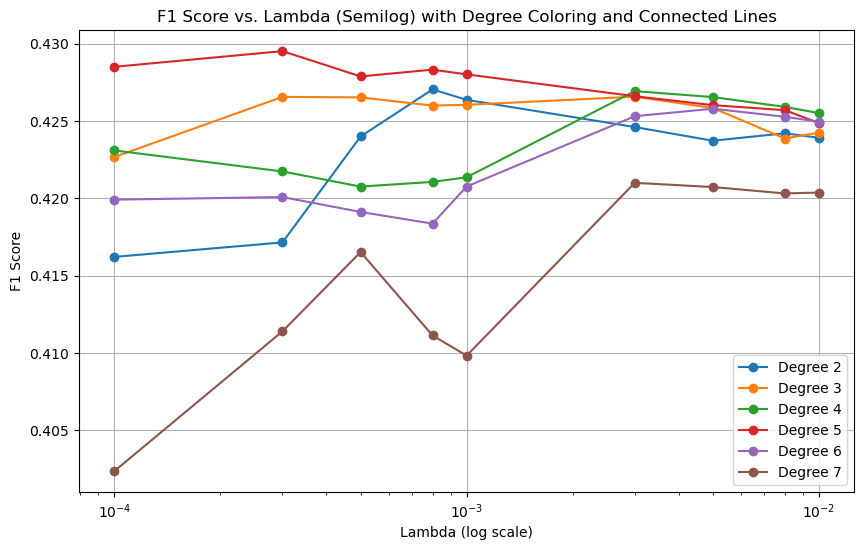

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_10_results' contains the results
lambdas = [result['Lambda'] for result in top_10_results]
f1_scores = [result['F1 Score'] for result in top_10_results]
degrees = [result['Degree'] for result in top_10_results]

# Sort the results by lambda for connected lines
sorted_indices = np.argsort(lambdas)
lambdas = np.array(lambdas)[sorted_indices]
f1_scores = np.array(f1_scores)[sorted_indices]
degrees = np.array(degrees)[sorted_indices]

# Create a semilog plot with lambda on the x-axis and F1 score on the y-axis
plt.figure(figsize=(10, 6))
for degree in set(degrees):
    degree_indices = np.where(degrees == degree)
    plt.semilogx(lambdas[degree_indices], f1_scores[degree_indices], marker='o', label=f'Degree {degree}')

plt.xlabel('Lambda (log scale)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Lambda (Semilog) with Degree Coloring and Connected Lines')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
## Hyperparameter search
threshs = [1]
dups = [3]
lambdas = np.linspace(0.00027, 0.00031, num=20)
degrees = [5]

x_tr_dk = replace_dk_values_with_nan(x_tr_sp)
x_val_dk = replace_dk_values_with_nan(x_val_sp)

f1_best = 0
dup_best = 100
thresh_best = 100
deg_best = 100
lambda_best = 100

top_10_results = []

for thresh in threshs:
    x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)
    x_tr_std, x_val_std = standardize(x_tr_less_nan, x_val_less_nan)
    x_tr_no_nan, x_val_no_nan = nan_to_zero(x_tr_std, x_val_std)

    for dup in dups:
        x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_no_nan, y_tr_sp, dup)

        x_tr = x_tr_duplicated
        x_val = x_val_no_nan
        y_tr = y_tr_duplicated
        y_val = y_val_sp

        for deg in degrees:
            x_poly_tr = build_poly(x_tr, deg)
            x_poly_val = build_poly(x_val, deg)
            tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]
            
            for lambda_ in lambdas:
                print("Threshold:", thresh, " # Duplications:", dup, "Degree:", deg, "Lambda:", lambda_)
                
                w_rr = ridge_regression(y_tr, tx, lambda_)
                f1 = predict_and_evaluate(x_poly_val, w_rr, y_val, regression_type = "gd")

                result = {
                "Threshold": thresh,
                "Duplications": dup,
                "Degree": deg,
                "Lambda": lambda_,
                "F1 Score": f1
                }

                if f1 > f1_best:
                    f1_best = f1
                    dup_best = dup
                    thresh_best = thresh
                    deg_best = deg
                    lambda_best = lambda_

                top_10_results.append(result)

print("BEST RESULT: ", "Threshold: ", thresh_best, "# duplications: ", dup_best, "lambda: ", lambda_best, "degree: ", deg_best, "f1: ", f1_best)

top_10_results.sort(key=lambda x: x["F1 Score"], reverse=True)

print("Top 10 Results with the Highest F1 Scores:")
for i, result in enumerate(top_10_results[:10]):
    print(f"Rank {i + 1}:")
    print(f"Threshold: {result['Threshold']}")
    print(f"Duplications: {result['Duplications']}")
    print(f"Degree: {result['Degree']}")
    print(f"Lambda: {result['Lambda']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("---------------------------------------------")

Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00027


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759352095936124
F1-score: 0.4275871766029246
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00027210526315789475


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759352095936124
F1-score: 0.4275871766029246
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002742105263157895


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759199719627593
F1-score: 0.42747662237221395
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002763157894736842


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8759352095936124
F1-score: 0.4275066797918717
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00027842105263157894


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777484876651378
F1-score: 0.42965806497476366
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002805263157894737


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777484876651378
F1-score: 0.4297391427962186
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00028263157894736844


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295969862818963
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002847368421052632


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295969862818963
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002868421052631579


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295969862818963
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00028894736842105263


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8776875371417252
F1-score: 0.4294548297675741
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002910526315789474


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8776875371417252
F1-score: 0.4294548297675741
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002931578947368421


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8776875371417252
F1-score: 0.4294548297675741
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002952631578947368


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8776875371417252
F1-score: 0.4294548297675741
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00029736842105263157


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295158882490936
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0002994736842105263


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8777180124034315
F1-score: 0.4295158882490936
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00030157894736842106


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757371203925214
F1-score: 0.42687469252934146
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0003036842105263158


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757371203925214
F1-score: 0.42687469252934146
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.0003057894736842105


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757523580233745
F1-score: 0.42690469496766936
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00030789473684210525


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.875798070915934
F1-score: 0.4269947275922671
Threshold: 1  # Duplications: 3 Degree: 5 Lambda: 0.00031


c:\Users\hany_\anaconda3\envs\ml\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.8757828332850809
F1-score: 0.42696471249824264
BEST RESULT:  Threshold:  1 # duplications:  3 lambda:  0.0002805263157894737 degree:  5 f1:  0.4297391427962186
Top 10 Results with the Highest F1 Scores:
Rank 1:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0002805263157894737
F1 Score: 0.4297391427962186
---------------------------------------------
Rank 2:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.00027842105263157894
F1 Score: 0.42965806497476366
---------------------------------------------
Rank 3:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.00028263157894736844
F1 Score: 0.4295969862818963
---------------------------------------------
Rank 4:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0002847368421052632
F1 Score: 0.4295969862818963
---------------------------------------------
Rank 5:
Threshold: 1
Duplications: 3
Degree: 5
Lambda: 0.0002868421052631579
F1 Score: 0.4295969862818963
---------------------------------------------
Rank 6:
Threshold: 1
D

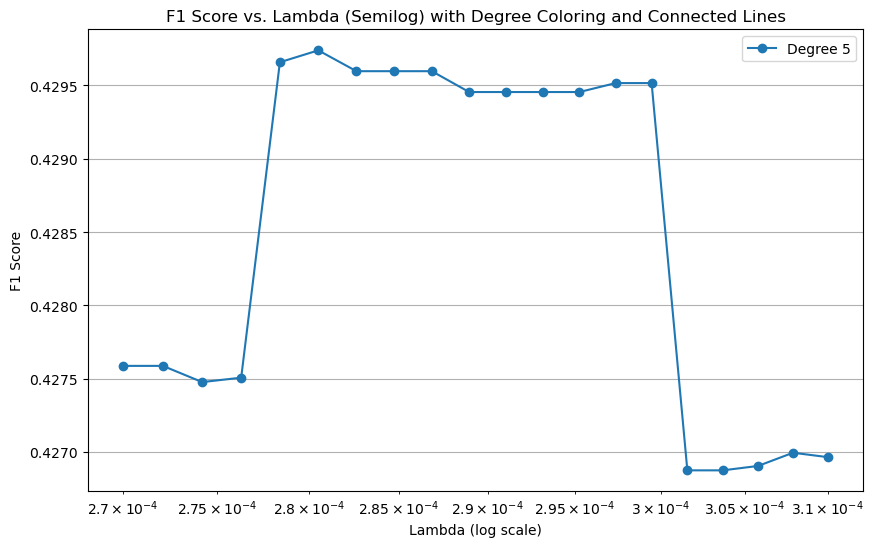

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_10_results' contains the results
lambdas = [result['Lambda'] for result in top_10_results]
f1_scores = [result['F1 Score'] for result in top_10_results]
degrees = [result['Degree'] for result in top_10_results]

# Sort the results by lambda for connected lines
sorted_indices = np.argsort(lambdas)
lambdas = np.array(lambdas)[sorted_indices]
f1_scores = np.array(f1_scores)[sorted_indices]
degrees = np.array(degrees)[sorted_indices]

# Create a semilog plot with lambda on the x-axis and F1 score on the y-axis
plt.figure(figsize=(10, 6))
for degree in set(degrees):
    degree_indices = np.where(degrees == degree)
    plt.semilogx(lambdas[degree_indices], f1_scores[degree_indices], marker='o', label=f'Degree {degree}')

plt.xlabel('Lambda (log scale)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Lambda (Semilog) with Degree Coloring and Connected Lines')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
## Hyperparameter search
threshs = [0.5]
dups = [3]
lambdas = [0]
degrees = [4]

x_tr_dk = replace_dk_values_with_nan(x_tr_sp)
x_val_dk = replace_dk_values_with_nan(x_val_sp)

f1_best = 0
dup_best = 100
thresh_best = 100
deg_best = 100
lambda_best = 100

top_10_results = []

for thresh in threshs:
    x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)
    x_tr_std, x_val_std = standardize(x_tr_less_nan, x_val_less_nan)
    x_tr_no_nan, x_val_no_nan = nan_to_zero(x_tr_std, x_val_std)

    for dup in dups:
        x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_no_nan, y_tr_sp, dup)

        x_tr = x_tr_duplicated
        x_val = x_val_no_nan
        y_tr = y_tr_duplicated
        y_val = y_val_sp

        for deg in degrees:
            x_poly_tr = build_poly(x_tr, deg)
            x_poly_val = build_poly(x_val, deg)
            tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]
            
            for lambda_ in lambdas:
                print("Threshold:", thresh, " # Duplications:", dup, "Degree:", deg, "Lambda:", lambda_)
                
                w_rr = ridge_regression(y_tr, tx, lambda_)
                f1 = predict_and_evaluate(x_poly_val, w_rr, y_val, regression_type = "gd")

                result = {
                "Threshold": thresh,
                "Duplications": dup,
                "Degree": deg,
                "Lambda": lambda_,
                "F1 Score": f1
                }

                if f1 > f1_best:
                    f1_best = f1
                    dup_best = dup
                    thresh_best = thresh
                    deg_best = deg
                    lambda_best = lambda_

                top_10_results.append(result)

print("BEST RESULT: ", "Threshold: ", thresh_best, "# duplications: ", dup_best, "lambda: ", lambda_best, "degree: ", deg_best, "f1: ", f1_best)

top_10_results.sort(key=lambda x: x["F1 Score"], reverse=True)

print("Top 10 Results with the Highest F1 Scores:")
for i, result in enumerate(top_10_results[:10]):
    print(f"Rank {i + 1}:")
    print(f"Threshold: {result['Threshold']}")
    print(f"Duplications: {result['Duplications']}")
    print(f"Degree: {result['Degree']}")
    print(f"Lambda: {result['Lambda']}")
    print(f"F1 Score: {result['F1 Score']}")
    print("---------------------------------------------")

Threshold: 0.5  # Duplications: 3 Degree: 4 Lambda: 0


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [6]:
thresh = 1
dup = 3
deg = 5
lambda_ = 0.0002805263157894737

# Treat dk, refuse and nan the same
x_tr_dk = replace_dk_values_with_nan(x_tr_remove_col)
x_val_dk = replace_dk_values_with_nan(x_te_remove_col)

# Keeping columns with less than threshold% of nan
x_tr_less_nan, x_val_less_nan = filter_nan_threshold(x_tr_dk, x_val_dk, threshold=thresh)

# Nan to mean
x_tr_no_nan, x_val_no_nan = nan_to_mean(x_tr_less_nan, x_val_less_nan)

# Standardize
x_tr_std, x_val_std = standardize(x_tr_no_nan, x_val_no_nan)

# Duplicate 1 rows to balance dataset
x_tr_duplicated, y_tr_duplicated = duplicate_1rows(x_tr_std, y_tr_raw, dup)

x_tr_full = x_tr_duplicated
x_val_full = x_val_std
y_tr_full = y_tr_duplicated

In [7]:
x_poly_tr = build_poly(x_tr_full, deg)
x_poly_val = build_poly(x_val_full, deg)

tx = np.c_[np.ones((x_poly_tr.shape[0], 1)), x_poly_tr]


In [8]:
w_tmp, loss = ridge_regression(y_tr_full, tx, lambda_)

c:\Users\andre\Anaconda\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [9]:
y_pred = predict(x_poly_val, w_tmp, "gd")
name = "rr poly nantomean 7777799999"
create_csv_submission(test_ids, y_pred, name)